In [2]:
from __future__ import print_function
from collections import defaultdict
import numpy as np
import scipy as sp
import cPickle as pickle
import time
import os

data_root = os.path.expanduser("~") + '/data/CSE255/'
%matplotlib inline
import matplotlib.pyplot as plt

In [10]:
start_time = time.time()
all_data = pickle.load(open(data_root + "all_data.pickle", "rb"))
print(time.time() - start_time)

17.6460959911


In [3]:
all_size = len(all_data)
train_size = 900000
# train_size = all_size # uncomment this to produce test
valid_size = 100000
train_data = all_data[:train_size]
valid_data = all_data[all_size - valid_size:]

In [4]:
train_helpfuls = np.array([d['helpful']['nHelpful'] for d in train_data])
train_outofs =  np.array([d['helpful']['outOf'] for d in train_data])

In [18]:
# distribution of the ratios
train_helpfuls_non_zero = train_helpfuls[train_outofs != 0].astype(float)
train_outofs_non_zero = train_outofs[train_outofs != 0].astype(float)
train_ratios_non_zero = train_helpfuls_non_zero / train_outofs_non_zero
train_ratios_non_zero = train_ratios_non_zero[train_ratios_non_zero <= 1]

In [43]:
print(len(train_ratios_non_zero[train_ratios_non_zero < 0.5]) / float(len(train_ratios_non_zero)))
print(len(train_ratios_non_zero[train_ratios_non_zero >= 0.5]) / float(len(train_ratios_non_zero)))

0.168061829356
0.831938170644


(array([  50831.,     462.,    1121.,    1176.,    2111.,    4712.,
          11127.,    1574.,    5745.,    1207.,   49536.,    4267.,
          10265.,   28394.,    7588.,   21414.,   20042.,   13194.,
          11463.,  230179.]),
 array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
         0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,
         0.9 ,  0.95,  1.  ]),
 <a list of 20 Patch objects>)

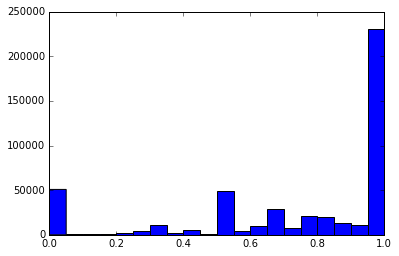

In [41]:
plt.hist(train_ratios_non_zero, bins=20)

In [37]:
# what are the outofs if helpfuls == 0?
def count_occurance(the_list, key):
    is_equals = [l == key for l in the_list]
    return np.sum(is_equals)

train_helpfuls_non_zero = train_helpfuls[train_outofs != 0].astype(float)
train_outofs_non_zero = train_outofs[train_outofs != 0].astype(float)

count_occurance(train_outofs_non_zero[train_helpfuls_non_zero == 0], 1)
count_occurance(train_outofs_non_zero[train_helpfuls_non_zero == 0], 2)
count_occurance(train_outofs_non_zero[train_helpfuls_non_zero == 0], 3)
count_occurance(train_outofs_non_zero[train_helpfuls_non_zero == 0], 4)
count_occurance(train_outofs_non_zero[train_helpfuls_non_zero == 0], 5)
count_occurance(train_outofs_non_zero[train_helpfuls_non_zero == 0], 6)
count_occurance(train_outofs_non_zero[train_helpfuls_non_zero == 0], 7)
count_occurance(train_outofs_non_zero[train_helpfuls_non_zero == 0], 30)

2

In [5]:
outofs = sorted(list(set(train_outofs)))
outofs = outofs[1:]
outofs = np.array(outofs)

mean_helpfuls = [np.mean(train_helpfuls[train_outofs == outof]) for outof in outofs]
mean_helpfuls = np.array(mean_helpfuls)

# stats
ratios = mean_helpfuls / outofs
outofs_counts = np.array([(train_helpfuls[train_outofs == outof]).shape[0] for outof in outofs])

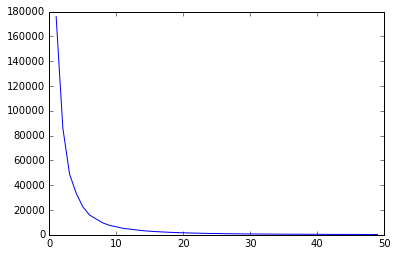

In [100]:
plt.plot(outofs[outofs < 50], outofs_counts[outofs < 50])

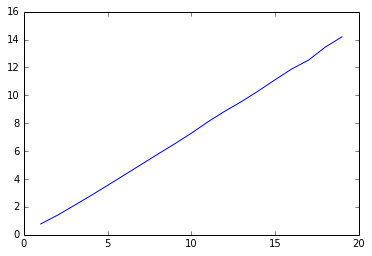

In [6]:
plt.plot(outofs[outofs < 500], mean_helpfuls[outofs < 500])

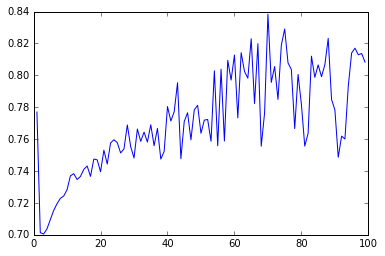

In [8]:
plt.plot(outofs[outofs < 100], ratios[outofs < 100])

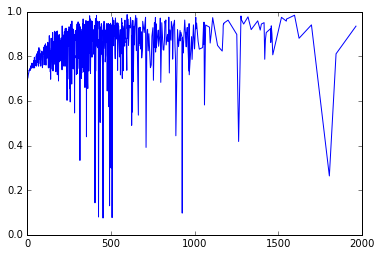

In [104]:
plt.plot(outofs[outofs < 2000], ratios[outofs < 2000])

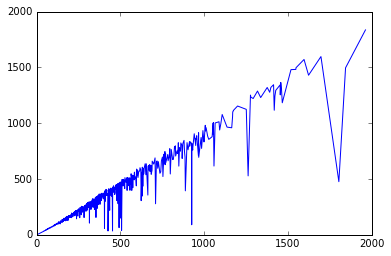

In [105]:
plt.plot(outofs[outofs < 2000], mean_helpfuls[outofs < 2000])

In [110]:
def get_occur_stats(valid_data, users_ratio, items_ratio):
    stats = dict()
    stats['in_user_in_item'] = 0
    stats['in_user_not_in_item'] = 0
    stats['not_in_user_in_item'] = 0
    stats['not_in_user_not_in_item'] = 0
    
    for d in valid_data:
        user_id = d['reviewerID']
        item_id = d['itemID']

        if (user_id in users_ratio) and (item_id in items_ratio):
            stats['in_user_in_item'] += 1
        elif (user_id in users_ratio) and (item_id not in items_ratio):
            stats['in_user_not_in_item'] += 1
        elif (user_id not in users_ratio) and (item_id in items_ratio):
            stats['not_in_user_in_item'] += 1
        else:
            stats['not_in_user_not_in_item']
    return stats

array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
         12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
         23,   24,   25,   26,   27,   28,   29,   30,   31,   32,   33,
         34,   35,   36,   37,   38,   39,   40,   41,   42,   43,   44,
         45,   46,   47,   48,   49,   50,   51,   52,   53,   54,   55,
         56,   57,   58,   59,   60,   61,   62,   63,   64,   65,   66,
         67,   68,   69,   70,   71,   72,   73,   74,   75,   76,   77,
         78,   79,   80,   81,   82,   83,   84,   85,   86,   87,   88,
         89,   90,   91,   92,   93,   94,   95,   96,   97,   98,   99,
        100,  101,  102,  103,  104,  105,  106,  107,  108,  109,  110,
        111,  112,  113,  114,  115,  116,  117,  118,  119,  120,  121,
        122,  123,  124,  125,  126,  127,  128,  129,  130,  131,  132,
        133,  134,  135,  136,  137,  138,  139,  140,  141,  142,  143,
        144,  145,  146,  147,  148,  149,  150,  1

In [114]:
ratios[outofs == 1805]

array([ 0.26371191])

In [115]:
for d in train_data:
    if int(d['helpful']['outOf']) == 1805:
        break

In [122]:
bad_collect = []
for d in train_data:
    if d['reviewerID'] == 'U690082877':
        bad_collect.append(d)

In [127]:
bad_outofs = [d['helpful']['outOf'] for d in bad_collect]
bad_helpfuls = [d['helpful']['nHelpful'] for d in bad_collect]

In [132]:
print(zip(bad_outofs, bad_helpfuls))

[(7, 4), (12, 10), (43, 25), (43, 25), (39, 26), (97, 88), (5, 3), (276, 238), (4, 2), (86, 81), (1, 1), (31, 21), (17, 13), (66, 56), (5, 4), (8, 7), (17, 17), (1, 1), (21, 20), (3, 3), (5, 3), (4, 4), (1, 1), (11, 11), (4, 3), (171, 121), (5, 5), (44, 22), (40, 32), (6, 6), (37, 22), (2, 2), (5, 5), (1, 1), (7, 6), (7, 6), (7, 6), (29, 13), (5, 4), (44, 36), (16, 10), (9, 7), (10, 9), (4, 4), (22, 20), (26, 14), (148, 140), (3, 1), (10, 9), (13, 11), (32, 29), (14, 12), (9, 4), (12, 9), (1805, 476), (4, 3), (51, 28), (3, 2), (50, 37), (0, 0), (61, 44), (3, 2), (525, 451), (6, 6), (1, 1), (28, 17), (21, 13), (8, 5), (6, 6), (14, 9), (186, 66), (487, 425), (6, 3), (18, 12), (66, 63), (52, 28), (79, 49), (15, 14), (8, 8), (17, 11), (3, 3), (4, 2), (157, 150), (3, 2), (771, 646), (5, 5), (29, 20), (90, 87), (4, 4), (173, 110), (9, 5)]


'U690082877'

In [133]:
# the max outof in test set is 2386

test_data = pickle.load(open(data_root + "helpful_data.pickle", "rb"))

outofs =  np.array([d['helpful']['outOf'] for d in test_data])

outofs = sorted(list(set(outofs)))
outofs = outofs[1:]
outofs = np.array(outofs)

outofs_counts = np.array([(train_helpfuls[train_outofs == outof]).shape[0] for outof in outofs])

print(outofs)

[   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15
   16   17   18   19   20   21   22   23   24   25   26   27   28   29   30
   31   32   33   34   35   36   37   38   39   40   41   42   43   44   45
   46   47   48   49   50   51   52   53   54   55   56   57   58   59   60
   61   62   63   64   65   66   67   68   69   70   71   72   73   74   75
   76   77   78   79   80   81   82   83   84   85   86   87   88   89   90
   91   92   93   94   95   96   97   98   99  100  101  104  105  106  107
  108  109  111  112  114  116  117  118  119  120  121  122  123  124  125
  126  127  128  129  130  131  132  133  134  135  136  137  139  140  141
  142  143  144  146  147  148  149  151  153  154  155  156  157  158  160
  161  163  164  165  166  168  170  171  174  175  177  178  179  186  187
  188  189  191  192  195  197  200  201  202  203  204  206  209  210  212
  214  218  221  222  224  227  230  238  239  241  244  246  248  255  259
  269  272  

In [137]:
for d in test_data:
    if d['reviewerID'] == 'U690082877':
        break

In [3]:
test_data = pickle.load(open(data_root + "helpful_data.pickle", "rb"))

In [12]:
a = np.array([len(d['reviewText']) for d in all_data])
len(a[a == 0])

42

In [108]:
# outofs =  np.array([d['helpful']['outOf'] for d in valid_data])

# outofs = sorted(list(set(outofs)))
# outofs = outofs[1:]
# outofs = np.array(outofs)

# outofs_counts = np.array([(train_helpfuls[train_outofs == outof]).shape[0] for outof in outofs])

# print(outofs)